In [ ]:
# !pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import os

In [ ]:
# data retrieved from:
# https://www.kaggle.com/datasets/mirichoi0218/insurance
df = pd.read_csv('insurance.csv')

In [ ]:
# show data
print("shape of data: ", df.shape)
print(df.columns)
df

shape of data:  (1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Analyzing the Data



age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


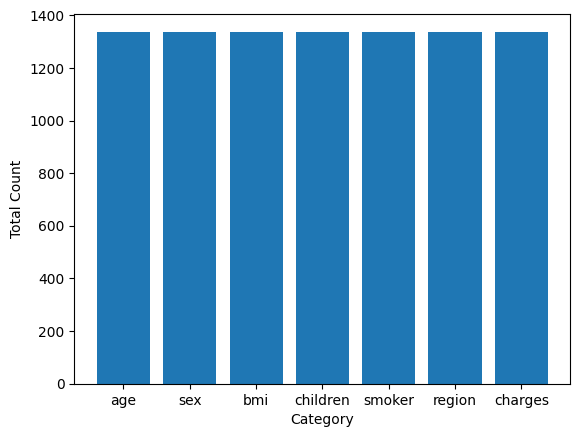

In [ ]:
# look for imbalance total data
count = df.count() # all data has 1338 total, meaning there is no nan data
print(count)

plt.bar(df.columns, count)
plt.ylabel("Total Count")
plt.xlabel("Category")
plt.show()

age
18    69
19    68
20    29
21    28
22    28
dtype: int64


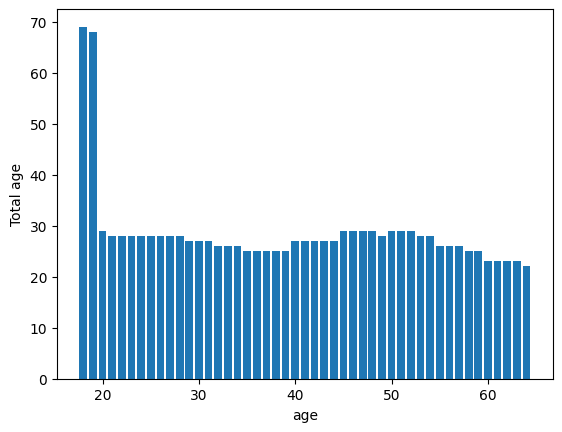

In [ ]:
# looks for imbalance in age. Very skewed towards the younger ones
age = df.groupby("age").size()
print(age.head())

plt.bar(age.index, age.values)
plt.ylabel("Total age")
plt.xlabel("age")
plt.show()

sex
female    662
male      676
dtype: int64


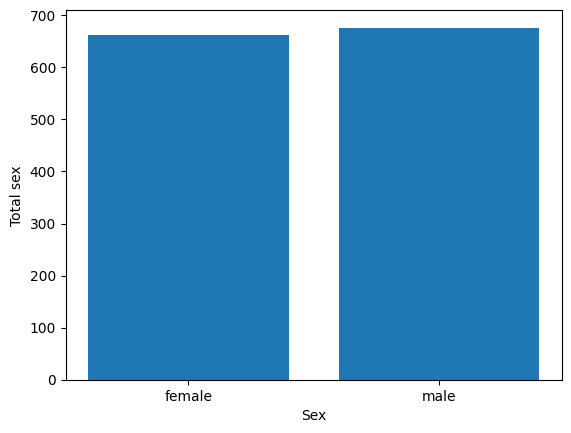

In [ ]:
# looks for imbalance in sex. It is very close
sex = df.groupby("sex").size()
print(sex)

plt.bar(sex.index, sex.values)
plt.ylabel("Total sex")
plt.xlabel("Sex")
plt.show()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64


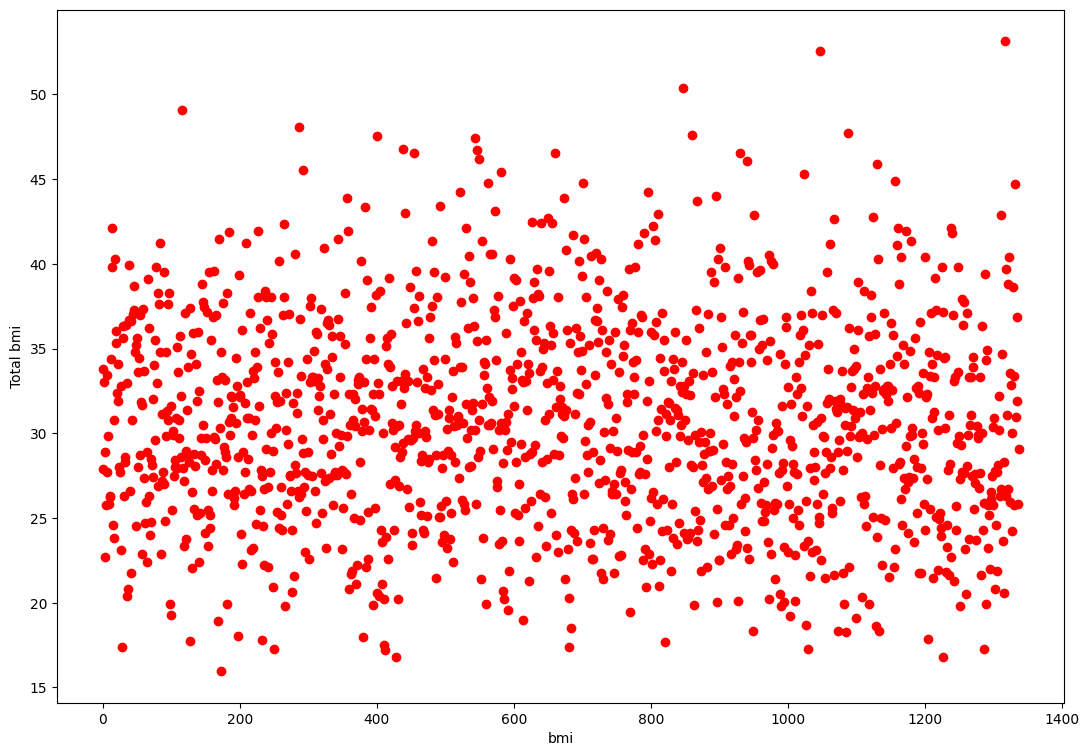

In [ ]:
# looks for imbalance in bmi. Skewed heavily towards the middle
print(df.bmi.head())

plt.figure(figsize=(13,9))
plt.plot(df.bmi, 'ro')
plt.ylabel("Total bmi")
plt.xlabel("bmi")
plt.show()

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64


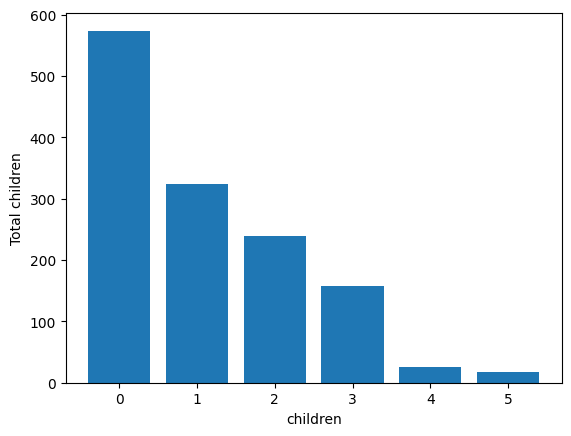

In [ ]:
# looks for imbalance in children. Skewed towards lower numbers
children = df.groupby("children").size()
print(children)

plt.bar(children.index, children.values)
plt.ylabel("Total children")
plt.xlabel("children")
plt.show()

smoker
no     1064
yes     274
dtype: int64


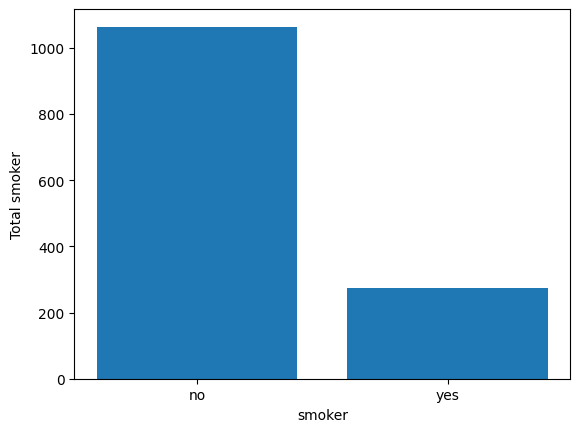

In [ ]:
# looks for imbalance in smoker. Skewed towards non smokers
smoker = df.groupby("smoker").size()
print(smoker)

plt.bar(smoker.index, smoker.values)
plt.ylabel("Total smoker")
plt.xlabel("smoker")
plt.show()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


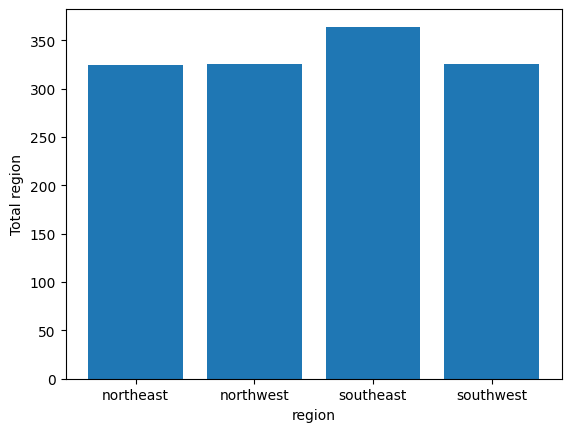

In [ ]:
# looks for imbalance in sex. Seems like there is a bit more for southeast
region = df.groupby("region").size()
print(region)

plt.bar(region.index, region.values)
plt.ylabel("Total region")
plt.xlabel("region")
plt.show()

# Comparison within Data

In [ ]:
# Sex
# sns.pairplot(data=df, hue="sex")

In [ ]:
# Children
# sns.pairplot(data=df, hue="children")

In [ ]:
# Smoker
# sns.pairplot(data=df, hue="smoker")

In [ ]:
# Region
# sns.pairplot(data=df, hue="region")

# Setup Model for testing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()
sc = MinMaxScaler()

In [ ]:
# split the data
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y = df[['charges']]

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(X['smoker'].value_counts())
print(X['sex'].value_counts())
print(X['region'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64
male      676
female    662
Name: sex, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
X['smoker'] = le.fit_transform(X['smoker'])
X['sex'] = le.fit_transform(X['sex'])
X['region'] = le.fit_transform(X['region'])

<ipython-input-379-fc32a6aa3560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = le.fit_transform(X['smoker'])
<ipython-input-379-fc32a6aa3560>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = le.fit_transform(X['sex'])
<ipython-input-379-fc32a6aa3560>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
print(X['smoker'].value_counts())
print(X['sex'].value_counts())
print(X['region'].value_counts())

0    1064
1     274
Name: smoker, dtype: int64
1    676
0    662
Name: sex, dtype: int64
2    364
3    325
1    325
0    324
Name: region, dtype: int64


In [ ]:
for i in range(le.classes_.shape[0]):
  print(f"{i} = {le.classes_[i]}")
X
print(type(X))

0 = northeast
1 = northwest
2 = southeast
3 = southwest
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X = sc.fit_transform(X)
X
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
# split the data by column
Y = sc.fit_transform(Y)
print(type(Y))

<class 'numpy.ndarray'>


In [ ]:
print("X:")
print(X.shape)
print(X)

print("\nY:")
print(Y.shape)
print(Y)

X:
(1338, 6)
[[0.02173913 0.         0.3212268  0.         1.         1.        ]
 [0.         1.         0.47914985 0.2        0.         0.66666667]
 [0.2173913  1.         0.45843422 0.6        0.         0.66666667]
 ...
 [0.         0.         0.56201238 0.         0.         0.66666667]
 [0.06521739 0.         0.26472962 0.         0.         1.        ]
 [0.93478261 0.         0.35270379 0.         1.         0.33333333]]

Y:
(1338, 1)
[[0.25161076]
 [0.00963595]
 [0.05311516]
 ...
 [0.00810808]
 [0.01414352]
 [0.44724873]]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
# split the dataset into 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, random_state=42)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(X_train))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X_train.shape)
X_train[0:5]

(1070, 6)


array([[0.60869565, 0.        , 0.10734463, 0.4       , 0.        ,
        0.33333333],
       [0.63043478, 0.        , 0.22491256, 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.        , 0.23944041, 0.        , 0.        ,
        0.66666667],
       [0.45652174, 0.        , 0.49394673, 1.        , 0.        ,
        0.66666667],
       [0.7826087 , 0.        , 0.14823783, 0.6       , 0.        ,
        0.33333333]])

In [ ]:
print(X_test.shape)
X_test[0:5]

(268, 6)


array([[0.58695652, 0.        , 0.24791499, 0.4       , 0.        ,
        0.        ],
       [0.39130435, 0.        , 0.37826204, 0.        , 0.        ,
        0.33333333],
       [1.        , 0.        , 0.29391983, 0.        , 1.        ,
        0.33333333],
       [0.60869565, 1.        , 0.26324993, 0.6       , 0.        ,
        0.33333333],
       [0.02173913, 1.        , 0.42937853, 0.        , 1.        ,
        0.33333333]])

In [ ]:
print(Y_train.shape)
Y_train[0:5]

(1070, 1)


array([[0.12884519],
       [0.11832353],
       [0.41495163],
       [0.11931567],
       [0.18122489]])

In [ ]:
print(Y_test.shape)
Y_test[0:5]

(268, 1)


array([[0.12726861],
       [0.06624737],
       [0.4502755 ],
       [0.13056997],
       [0.52081677]])

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=6))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# structure of model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                448       
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the data
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# fit the model
result = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))
# model.fit(X_train, Y_train, epochs=100, batch_size=107)

Epoch 1/50
34/34 [==============================] - 1s 6ms/step - loss: 0.0170 - val_loss: 0.0107
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0094
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0075
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0069
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 9/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 10/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 11/50
34/34 [

# Evaluting the Model

In [ ]:
result.history.keys()

dict_keys(['loss', 'val_loss'])

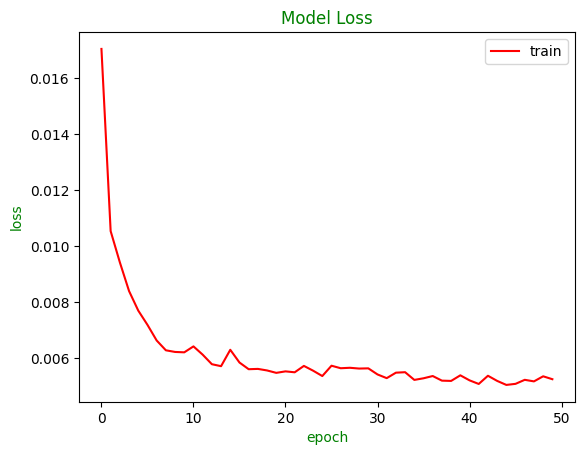

In [ ]:
loss = result.history['loss']
plt.plot(loss, color='red')
plt.title('Model Loss', color='green')
plt.ylabel('loss', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
results = model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.0060


In [ ]:
predictions = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


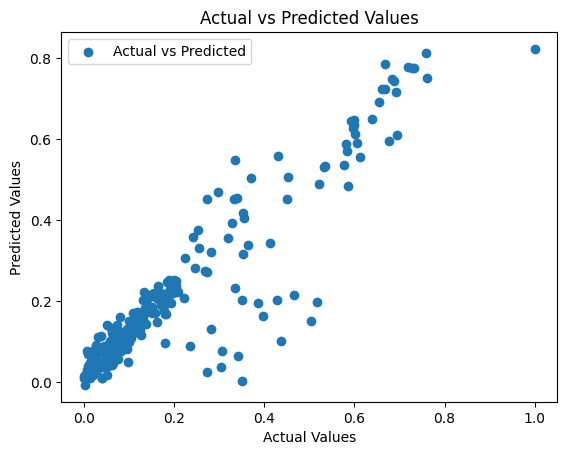

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, predictions, marker='o', label='Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()